# Book Price Prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
#from wordcloud import WordCloud, STOPWORDS
#!pip install -U textblob
from textblob import TextBlob
import re
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
#!pip install scipy
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importing the dataset
df=pd.read_excel("K://DATA SCIENCE Reference//Notebooks//Datasets//Participants_Data//Data_Train.xlsx")

In [3]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
df.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [6]:
#to get no.of unique values in dataset
df.nunique(axis=0)

Title           5568
Author          3679
Edition         3370
Reviews           36
Ratings          342
Synopsis        5549
Genre            345
BookCategory      11
Price           1614
dtype: int64

In [7]:
df['Reviews'].tail(40)

6197    4.6 out of 5 stars
6198    4.2 out of 5 stars
6199    3.6 out of 5 stars
6200    4.3 out of 5 stars
6201    3.8 out of 5 stars
6202    4.6 out of 5 stars
6203    4.3 out of 5 stars
6204    3.7 out of 5 stars
6205    4.3 out of 5 stars
6206    4.6 out of 5 stars
6207    4.9 out of 5 stars
6208    3.9 out of 5 stars
6209    4.9 out of 5 stars
6210    3.3 out of 5 stars
6211    4.0 out of 5 stars
6212    4.4 out of 5 stars
6213    5.0 out of 5 stars
6214    1.0 out of 5 stars
6215    4.7 out of 5 stars
6216    4.4 out of 5 stars
6217    4.2 out of 5 stars
6218    5.0 out of 5 stars
6219    4.2 out of 5 stars
6220    5.0 out of 5 stars
6221    4.6 out of 5 stars
6222    5.0 out of 5 stars
6223    4.4 out of 5 stars
6224    3.8 out of 5 stars
6225    4.6 out of 5 stars
6226    3.7 out of 5 stars
6227    4.7 out of 5 stars
6228    3.3 out of 5 stars
6229    4.1 out of 5 stars
6230    4.9 out of 5 stars
6231    4.1 out of 5 stars
6232    5.0 out of 5 stars
6233    3.3 out of 5 stars
6

In [8]:
#Cleaning the Reviews column
df['Reviews']=[x[:3] for x in df['Reviews']]

In [9]:
df['Reviews']

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: Reviews, Length: 6237, dtype: object

In [10]:
df['Reviews'].dtype

dtype('O')

In [11]:
#Converting the datatype to float
df['Reviews']=df['Reviews'].astype(float)

In [12]:
df['Reviews'].dtype

dtype('float64')

In [13]:
df['Ratings'].head(20)

0       8 customer reviews
1      14 customer reviews
2       6 customer reviews
3      13 customer reviews
4        1 customer review
5       8 customer reviews
6      72 customer reviews
7      16 customer reviews
8     111 customer reviews
9        1 customer review
10    132 customer reviews
11     17 customer reviews
12      4 customer reviews
13      3 customer reviews
14      5 customer reviews
15      2 customer reviews
16       1 customer review
17     23 customer reviews
18     76 customer reviews
19      5 customer reviews
Name: Ratings, dtype: object

In [14]:
df['Ratings'].tail(20)

6217     38 customer reviews
6218       1 customer review
6219     39 customer reviews
6220       1 customer review
6221    230 customer reviews
6222      2 customer reviews
6223    902 customer reviews
6224      6 customer reviews
6225      3 customer reviews
6226      8 customer reviews
6227      7 customer reviews
6228     21 customer reviews
6229     29 customer reviews
6230     20 customer reviews
6231    407 customer reviews
6232      2 customer reviews
6233      9 customer reviews
6234      3 customer reviews
6235      4 customer reviews
6236      2 customer reviews
Name: Ratings, dtype: object

In [15]:
df['Ratings']=[x[:-17] if(x[1]!=' ') else x[:-16] for x in df['Ratings']]

In [16]:
df['Ratings']

0       8 
1       14
2       6 
3       13
4        1
        ..
6232    2 
6233    9 
6234    3 
6235    4 
6236    2 
Name: Ratings, Length: 6237, dtype: object

In [17]:
#Finding maximum length of Ratings column.
l1=[len(x) for x in df['Ratings']]

In [18]:
max(l1)

5

In [19]:
#So, we have 5 digit number in ratings for somebooks
l1=[x for x in df['Ratings'] if len(x)>3]

In [20]:
l1

['1,416',
 '1,558',
 '1,142',
 '2,048',
 '1,097',
 '2,081',
 '2,084',
 '6,090',
 '1,227',
 '3,135',
 '1,392',
 '1,684',
 '1,403',
 '1,248',
 '1,563',
 '1,259',
 '2,255',
 '3,075',
 '1,256',
 '1,416']

In [21]:
# here we have , to the number/ we need to remove the , to convert the dtype to int
df['Ratings']=[x.replace(",","") if(len(x)>3) else x for x in df['Ratings']]

In [22]:
[x for x in df['Ratings'] if len(x)>3]

['1416',
 '1558',
 '1142',
 '2048',
 '1097',
 '2081',
 '2084',
 '6090',
 '1227',
 '3135',
 '1392',
 '1684',
 '1403',
 '1248',
 '1563',
 '1259',
 '2255',
 '3075',
 '1256',
 '1416']

In [23]:
df['Ratings'].dtype

dtype('O')

In [24]:
df['Ratings']=df['Ratings'].astype(int)

In [25]:
df['Ratings'].dtype

dtype('int32')

In [26]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [27]:
df['BookCategory'].value_counts()
#discreate variable

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [28]:
df['Edition'].head(40)

0                  Paperback,– 10 Mar 2016
1                   Paperback,– 7 Nov 2012
2                  Paperback,– 25 Feb 1982
3                   Paperback,– 5 Oct 2017
4                  Hardcover,– 10 Oct 2006
5                   Paperback,– 5 May 2009
6                   Paperback,– 5 Oct 2017
7           Hardcover,– Import, 1 Mar 2018
8                  Paperback,– 15 Dec 2015
9                  Paperback,– 26 Mar 2013
10                 Paperback,– 20 Jan 2017
11         Paperback,– Import, 14 Jun 2018
12                  Paperback,– 1 Jul 1999
13                 Paperback,– 15 Nov 2002
14                  Paperback,– 1 Sep 2011
15                 Paperback,– 26 Feb 2015
16                  Hardcover,– 8 Mar 2018
17                  Paperback,– 1 Nov 2016
18      Mass Market Paperback,– 1 Jan 1991
19                        Paperback,– 2016
20                 Hardcover,– 24 Nov 2018
21          Paperback,– Import, 4 Oct 2018
22                  Paperback,– 5 Jul 2012
23         

In [29]:
df['Edition_Year'] = df['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [30]:
df['Edition_Type'] = df['Edition'].apply(lambda x: x.split(',– ')[0])

In [31]:
df['Edition_Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Library Binding             1
(French),Paperback          1
Leather Bound               1
(German),Paperback          1
Board book                  1
Product Bundle              1
(Kannada),Paperback         1
Perfect Paperback           1
Plastic Comb                1
(Spanish),Paperback         1
Name: Edition_Type, dtype: int64

In [32]:
#Merging categories with small value counts
l=['Paperback','Hardcover','Mass Market Paperback']
df['Edition_Type'] = df['Edition_Type'].apply(lambda x: x if x in l else 'others')

In [33]:
df['Edition_Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
others                     66
Name: Edition_Type, dtype: int64

In [34]:
df['Edition_Year'].dtype

dtype('O')

In [35]:
df['Edition_Year']=df['Edition_Year'].astype('category')

In [36]:
df['Genre'].head(20)

0                     Action & Adventure (Books)
1                     Cinema & Broadcast (Books)
2                        International Relations
3                   Contemporary Fiction (Books)
4                          Photography Textbooks
5              Healthy Living & Wellness (Books)
6              Crime, Thriller & Mystery (Books)
7             Sports Training & Coaching (Books)
8          Biographies & Autobiographies (Books)
9                     Action & Adventure (Books)
10                                 Asian History
11                               Banks & Banking
12                    Action & Adventure (Books)
13                                 Asian History
14                    Action & Adventure (Books)
15                       Comics & Mangas (Books)
16    Children's Mysteries & Curiosities (Books)
17                                        Mangas
18         Biographies & Autobiographies (Books)
19                       Artificial Intelligence
Name: Genre, dtype: 

In [37]:
df['Genre'] = df['Genre'].apply(lambda x: x.replace('(Books)', ''))

In [38]:
df['Genre'].head(10)

0               Action & Adventure 
1               Cinema & Broadcast 
2           International Relations
3             Contemporary Fiction 
4             Photography Textbooks
5        Healthy Living & Wellness 
6        Crime, Thriller & Mystery 
7       Sports Training & Coaching 
8    Biographies & Autobiographies 
9               Action & Adventure 
Name: Genre, dtype: object

In [39]:
df['Genre'].nunique()

345

In [40]:
df['Synopsis'][2]

'"During the time men live without a common Power to keep them all in awe, they are in that condition which is called Warre"\n\nWritten during the turmoil of the English Civil War, Leviathan is an ambitious and highly original work of political philosophy. Claiming that man\'s essential nature is competitive and selfish, Hobbes formulates the case for a powerful sovereign—or "Leviathan"—to enforce peace and the law, substituting security for the anarchic freedom he believed human beings would otherwise experience. This worldview shocked many of Hobbes\'s contemporaries, and his work was publicly burnt for sedition and blasphemy when it was first published. But in his rejection of Aristotle\'s view of man as a naturally social being, and in his painstaking analysis of the ways in which society can and should function, Hobbes opened up a whole new world of political science.\n\nBased on the original 1651 text, this edition incorporates Hobbes\'s own corrections, while also retaining the 

In [41]:
df.Synopsis = df.Synopsis.apply(lambda x: " ".join(x.lower() for x in x.split()))
df.Synopsis = df.Synopsis.apply(lambda x: ' '.join(x for x in x.split() if x.isalnum()))

stop = stopwords.words('english')
df.Synopsis = df.Synopsis.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

st = PorterStemmer()
df.Synopsis = df.Synopsis.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [42]:
df['Synopsis'][2]

'time men live without common power keep condit call written turmoil english civil leviathan ambiti highli origin work polit claim essenti natur competit hobb formul case power enforc peac substitut secur anarch freedom believ human be would otherwis worldview shock mani work publicli burnt sedit blasphemi first reject view man natur social painstak analysi way societi hobb open whole new world polit base origin 1651 edit incorpor also retain origin spell read vivid introduct elucid one fascin work modern philosophi gener seventi penguin lead publish classic literatur penguin classic repres global bookshelf best work throughout histori across genr reader trust seri provid authorit text enhanc introduct note distinguish scholar contemporari well translat'

In [43]:
df['Sentiment'] = df.Synopsis.apply(lambda tweet: TextBlob(tweet).sentiment)

In [44]:
df['Sentiment']

0          (0.2818181818181818, 0.4949494949494949)
1        (0.09685314685314683, 0.39137529137529137)
2        (0.08214962121212122, 0.34611742424242425)
3                                       (0.0, 0.25)
4                        (0.5599999999999999, 0.61)
                           ...                     
6232     (0.03531746031746033, 0.29761904761904767)
6233    (-0.03761363636363636, 0.45920454545454537)
6234       (0.3336363636363636, 0.3754545454545455)
6235     (0.23095238095238096, 0.42857142857142866)
6236      (0.10555555555555556, 0.3861111111111111)
Name: Sentiment, Length: 6237, dtype: object

In [45]:
sentiment_series = df['Sentiment'].tolist()
columns = ['polarity', 'subjectivity']

df1 = pd.DataFrame(sentiment_series, columns=columns, index=df.index)

df['polarity'] = df1['polarity']
df['subjectivity'] = df1['subjectivity']

In [46]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year,Edition_Type,Sentiment,polarity,subjectivity
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,hunter return third brilliant novel sunday tim...,Action & Adventure,Action & Adventure,220.00,2016,Paperback,"(0.2818181818181818, 0.4949494949494949)",0.281818,0.494949
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,layer portrait troubl geniu art mere thing bea...,Cinema & Broadcast,"Biographies, Diaries & True Accounts",202.93,2012,Paperback,"(0.09685314685314683, 0.39137529137529137)",0.096853,0.391375
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,time men live without common power keep condit...,International Relations,Humour,299.00,1982,Paperback,"(0.08214962121212122, 0.34611742424242425)",0.082150,0.346117
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,hand grain found pocket murder rex king financ...,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,2017,Paperback,"(0.0, 0.25)",0.000000,0.250000
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,seven thrill world unrival present best photog...,Photography Textbooks,"Arts, Film & Photography",965.62,2006,Hardcover,"(0.5599999999999999, 0.61)",0.560000,0.610000


In [47]:
df.drop(['Synopsis','Title', 'Sentiment','Edition'], axis = 1, inplace = True)

In [48]:
df['Author'].nunique()

3679

### EDA

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

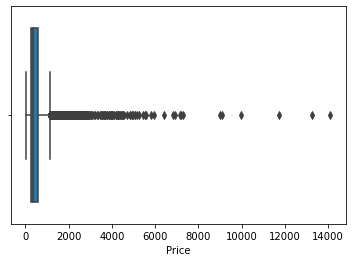

In [49]:
sns.boxplot(df['Price'])

In [50]:
df['Price'].describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [51]:
outliers = []
def Finding_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [52]:
Finding_outliers(df['Price'])

[1124.0,
 1125.0,
 1125.09,
 1128.0,
 1128.0,
 1128.8,
 1130.0,
 1130.0,
 1132.0,
 1133.0,
 1134.0,
 1135.0,
 1135.0,
 1137.0,
 1138.0,
 1141.0,
 1143.0,
 1143.0,
 1144.5,
 1147.0,
 1147.18,
 1149.0,
 1150.0,
 1150.0,
 1150.0,
 1153.0,
 1154.0,
 1155.0,
 1156.04,
 1157.0,
 1158.0,
 1159.0,
 1159.0,
 1160.0,
 1160.0,
 1168.0,
 1169.0,
 1169.22,
 1171.0,
 1172.0,
 1172.0,
 1173.0,
 1173.0,
 1174.0,
 1175.0,
 1178.0,
 1179.99,
 1182.0,
 1183.0,
 1187.0,
 1191.0,
 1194.0,
 1194.0,
 1196.0,
 1196.0,
 1196.0,
 1197.0,
 1197.0,
 1198.0,
 1199.0,
 1199.0,
 1199.0,
 1199.0,
 1199.0,
 1199.0,
 1199.0,
 1199.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1201.0,
 1203.0,
 1204.0,
 1204.0,
 1205.0,
 1205.0,
 1205.0,
 1207.0,
 1214.0,
 1214.0,
 1221.0,
 1224.0,
 1227.0,
 1229.0,
 1230.0,
 1233.0,
 1234.0,
 1238.0,
 1242.0,
 1244.0,
 1248.0,
 1248.0,
 1249.04,
 1250.0,
 1251.0,
 1252.0,
 1254.0,
 1255.0,
 1257.25,
 1261.0,
 1262.0,
 1265.0,
 1265.0,
 1267.0,
 1268.0,
 1268.0,
 1273.0,
 12

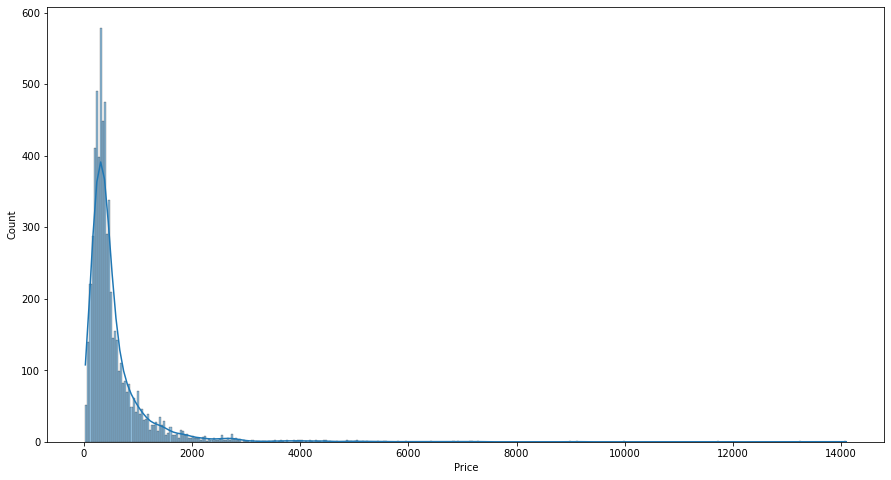

In [53]:
plt.figure(figsize=(15,8))
sns.histplot(x=df['Price'],kde=True)
plt.show()

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


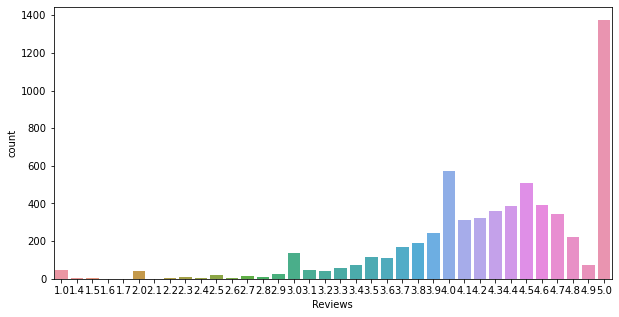

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(df['Reviews'])
plt.show()

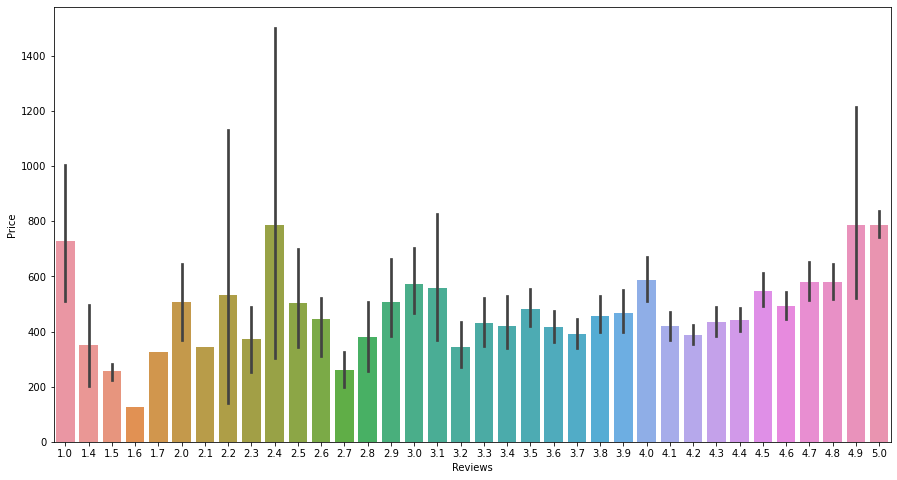

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Reviews'],y=df['Price'])
plt.show()

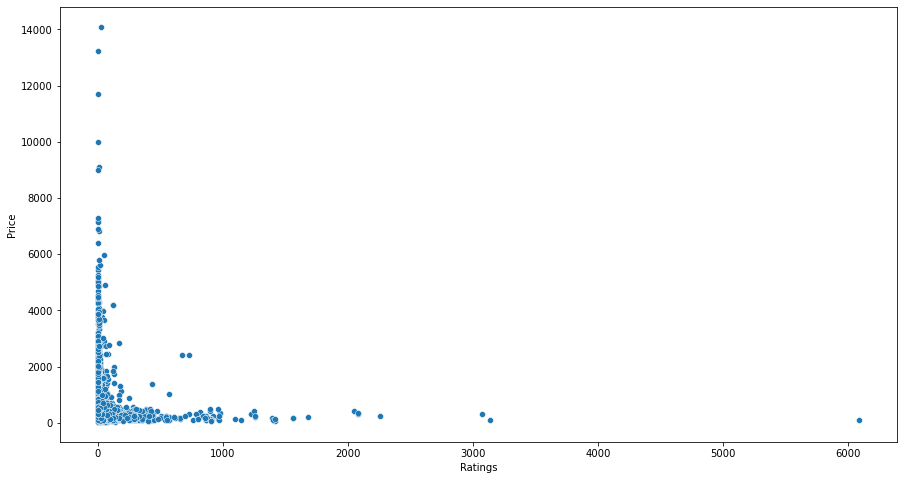

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Ratings'],y=df['Price'])
plt.show()

In [57]:
df.dtypes

Author            object
Reviews          float64
Ratings            int32
Genre             object
BookCategory      object
Price            float64
Edition_Year    category
Edition_Type      object
polarity         float64
subjectivity     float64
dtype: object

In [58]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = df.select_dtypes(include=['int64','float64','int32']).columns.tolist()
print(num_cols)

['Author', 'Genre', 'BookCategory', 'Edition_Year', 'Edition_Type']
['Reviews', 'Ratings', 'Price', 'polarity', 'subjectivity']


In [59]:
df['Author']=df.Author.astype("category").cat.codes
df['BookCategory']=df.BookCategory.astype("category").cat.codes
df['Edition_Type']=df.Edition_Type.astype("category").cat.codes
df['Edition_Year']=df.Edition_Year.astype("category").cat.codes
df['Genre']=df.Genre.astype("category").cat.codes

In [60]:
df.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year,Edition_Type,polarity,subjectivity
0,615,4.0,8,1,0,220.00,52,2,0.281818,0.494949
1,307,3.9,14,74,2,202.93,48,2,0.096853,0.391375
2,3390,4.8,6,193,6,299.00,18,2,0.082150,0.346117
3,62,4.1,13,92,5,180.00,53,2,0.000000,0.250000
4,953,5.0,1,253,1,965.62,42,0,0.560000,0.610000


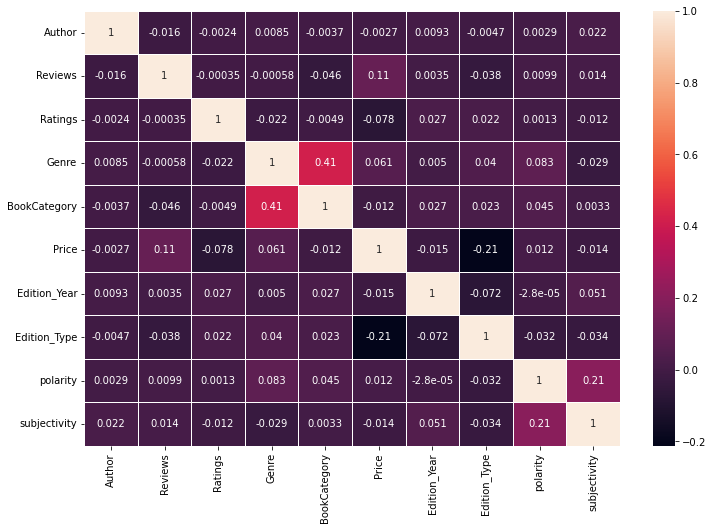

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, linewidths=1)
plt.show()

In [62]:
X = df.drop('Price', axis =1)
#y = df.Price
y, param = boxcox(df.Price)

print('Optimal lambda', param)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

Optimal lambda -0.13820326756118104


In [63]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [64]:
y_pred = regressor.predict(X_val)
mse(y_val, y_pred)

0.07569189094622722

In [65]:
from sklearn.metrics import r2_score
r2_score(y_val, y_pred)  

0.32704472049691036

In [66]:
xgregressor = XGBRegressor(n_estimators = 500, random_state = 42)
xgregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [67]:
y_pred = regressor.predict(X_val)
mse(y_val, y_pred)

0.07569189094622722